# SHAP For Classification 1 Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
X, y = shap.datasets.adult()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
cats = ['Workclass', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
nums = ['Age', 'Education-Num', 'Capital Gain', 'Capital Loss', 'Hours per week']

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cats),
        ('num', StandardScaler(), nums)
    ])

In [7]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000))
])

In [8]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Workclass',
                                                   'Marital Status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex', 'Country']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Education-Num',
                                                   'Capital Gain',
                                                   'Capital Loss',
                                                   'Hours per week'])])),
                ('classifier', LogisticRegression(max_iter=10000))])

In [9]:
X_sub = shap.sample(X_train, 100)

In [10]:
ex = shap.Explainer(model.predict_proba, X_sub)
shap_values = ex(X_test.iloc[0:100])

PermutationExplainer explainer: 101it [00:11,  1.62it/s]                                                               


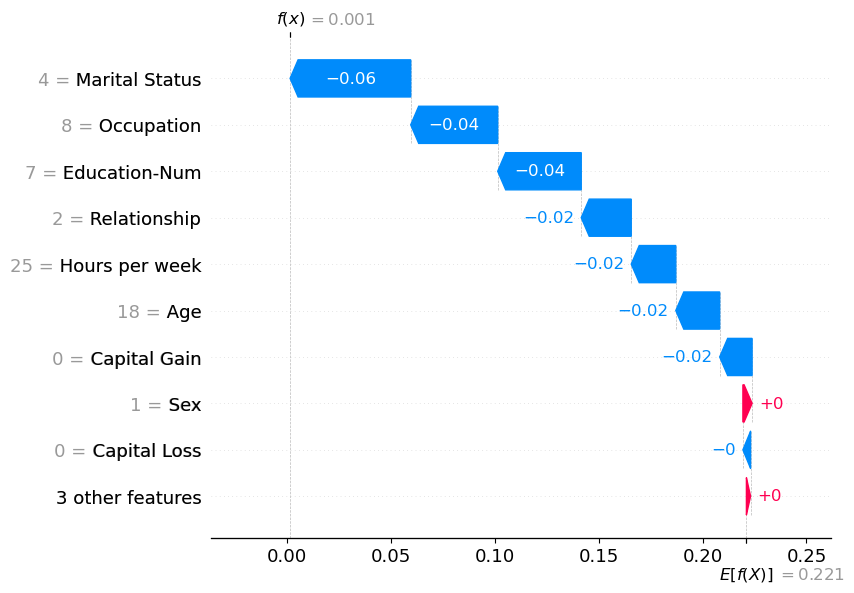

In [11]:
class_index = 1
data_index = 1
shap.plots.waterfall(shap_values[data_index,:,class_index])

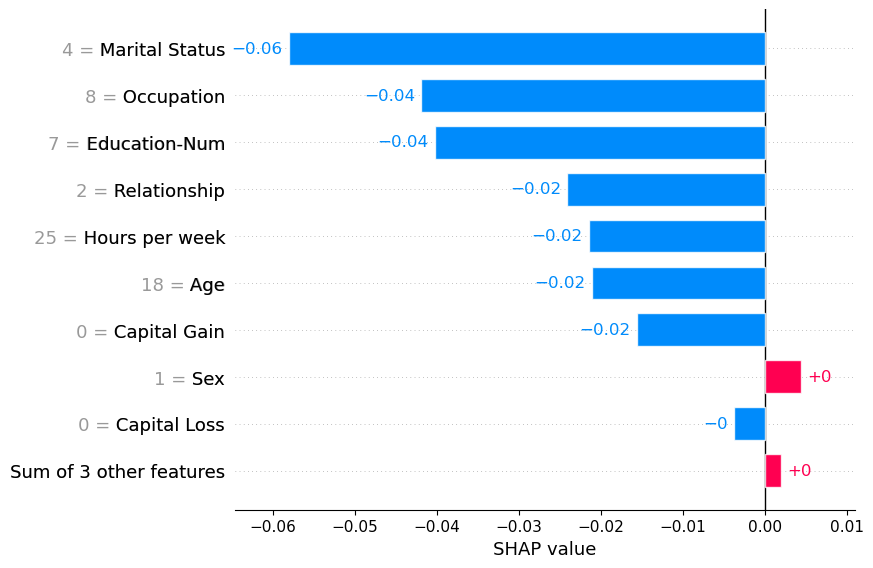

In [12]:
class_index = 1
shap.plots.bar(shap_values[data_index,:,class_index])

In [13]:
shap.initjs()
shap.plots.force(shap_values[data_index,:,class_index])